# Exercise 6

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2020)
Oliver Cordes & Thomas Erben

Homework is due on **Friday, 17/06/2020, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers in case of problems.
 * Your code(s) needs to be well and appropriately commented!
 * All files of your solution should be in the same directory as this notebook including scripts, images, additional notebooks etc.
 * References to files in scripts and notebooks should be done with relative paths
 * Finally submit this notebook with your solutions in the nbgrader system
 
**Main topics of this exercise:**
 * *numpy* 2d-arrays 
 * animations with matplotlib
 * text files
 * python lists

Put in here your group number: 

Group 12

Since we have a discussion about the workload of homework exercises and projects, we need some feedback. Please write the amount of time you have spent for this homework, including repition of tutorial sessions exercises and videos for each person of your group.

Spent time: 
 * Member 1: 6 hours
 * Member 2: 6 hours
 * Member 3: 6 hours
 
Please don't write your names! We just need the amount of hours!

# 1. Thermal Conduction (in 2 dimensions) (30 Points)

**Reminder**

In the previous Exercise sheet we covered the 1 dimensional thermal conduction. There, we discretized 1 dimensional length *x* by introducing a vector and computed the second spatial derivative using this vector *i.e.* ( $u'' = \partial^2 u/\partial x^2$) by:

$${u'}_{i+1/2} \approx \frac{u_{i+1}-u_{i}}{h} \qquad {u'}_{i-1/2} \approx \frac{u_{i}-u_{i-1}}{h}$$
and obtained
$${u''}_{i} \approx \frac{u_{i-1}-2 u_i + u_{i+1}}{h^2}. $$
Similarly for the time discretization we introduced $ u_{t+\Delta t} = u_{t} + \Delta t \cdot \kappa^2 {u''_i}. $

## 1. 2-D Thermal Conduction

For the 2-dimensional thermal conduction problem we can assume a plate which has a unit length of 1 in both $x$ and $y$ directions and constant zero temperature is applied from the all 4 sides. Then we follow the same discretization logic. The thermal distribution in this case can be written as:

$$\frac{\partial u }{\partial t} = \kappa^2 \Delta u $$

with:

$$\Delta u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} $$

If we are doing the same discretization with $N$ parts in $x$ and $y$ we can write our simulation equation now for any part with the indicess $i$ and $j$:

$$ u_{t+\Delta t,i,j} = u_{t,i,j} + \Delta t \cdot \kappa^2 \frac{u_{t,i-1,j} + u_{t,i+1,j} -4 u_{t,i,j}  + u_{t,i,j-1} + u_{t,i,j+1}}{h^2} $$

The boundary conditions are now $u_{t,0,j} = u_{t,N-1,j} = u_{t,i,0} = u_{t,i,N-1} = 0$.


The limits of the simulation can be given for a proper $\Delta t < \frac{h^2}{2\kappa^2}$.

Similar to the 1d thermal conduction we can define one initial condition:

$$u(x,y,0) = \sin(\pi x) \sin(\pi y) $$ for which we know the exact solution:

$$u(x,y, t) = \sin(\pi x)\sin(\pi y) \textrm{e}^{-\kappa^2 \pi^2 t}$$



**Your task**:

Your task is to implement a simulation (re-evaluation of the values at different time steps) of a metal plate using a 2D *numpy* array with $N\times N$ with $N=32$ elements. You should setup the given initial conditions *i.e.* the temperature should be constant and equal to 0 at all times. <br>
Write again function *update_time* that takes a 2-D numpy array, $\kappa$ and $\Delta t$ values as inputs and computes the heat equation at $t+\Delta t$. The function again don't need a return value since you can modify the numpy array in place.

To prove again your function, you can run the *update_time* function for 10000 times ($\kappa = 1$ and $\Delta t = 0.0001$) and divide your result with the initial condition. Compare these results array with the output of the exponential part of the exact solution. The result should exactly the same as for the 1d thermal conduction.

For the task we need to iniate a grid with the given 2-D function. Numpy offers a function *meshgrid* that allows creating such grids. Using *meshgrid* one can first generate two seperate grids $xx$ and $yy$ which are the 2-D extensions of the 1-D vectors $x$ and $y$ and obtain the desired grid values by multiplying those matricies. The following code explains the usage of *meshgrid* by creating a multiplication table for values from 1 to 10:

In [ ]:
import numpy as np

vector = np.arange(1,6)                           # create a 1d vector with the numbers from 1 to 10

# extend the vectors to a meshgrid
xx, yy = np.meshgrid(vector, vector)

print(xx)                                          # 10 x 10 version of x vector
print(yy)        
# Notice for yy it is the transpose of these values

# multiply both vectors
matrix = xx * yy
print(matrix)

You can create your initial grid with this method and update it with a function call.

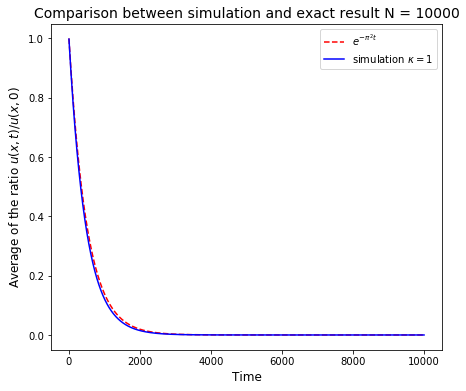

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 32 #Number of steps in which the x and y axes are split.
h = 1/N #Lenght of a step.

def update_time(heat_grid, kappa, deltat):
    
    """  Progates the discretized solution of the homogeneous 2d heat equation. 
    
          inputs:  - an initial 2d array heat_grid which represents a starting 
                     heat distribution.
                   - the termal conduction coefficient kappa.
                   - a time step deltat.
    """
    #Implementation of the formula for the discretized solution.    
    heat_grid[1:-1,1:-1] = heat_grid[1:-1,1:-1]+((deltat*kappa**2)/(h**2))*(heat_grid[1:-1,0:-2]
                    + heat_grid[1:-1,2:]-4*heat_grid[1:-1,1:-1]+heat_grid[0:-2,1:-1]+heat_grid[2:,1:-1])
    
    
interval = np.linspace(0, 1, N) #Discretization of one axis.
initial_condition = np.sin(np.pi*interval)
xx, yy = np.meshgrid(initial_condition, initial_condition) #Creation of a 2d array.
heat_grid = xx*yy #Initial heat distribution at time t = 0.

#Implementation of the boundary conditions.
heat_grid[0:,0] = 0
heat_grid[0:, np.shape(heat_grid)[1]-1] = 0
heat_grid[0, 0:] = 0
heat_grid[np.shape(heat_grid)[0]-1, 0:] = 0

# It saves the initial condition.
heat_grid_initial = heat_grid.copy()

#Number of simulations.
timesteps = 10000

#Initialization of an array that will contain the means.
means = np.zeros(timesteps, dtype=np.float64)

#Initial values for the simulation.
kappa = 1
deltat = 0.0001

#It recursively calls the function update_time and propagates the solution 
#of one step in time at each loop.
for i in list(range(timesteps)):
    update_time(heat_grid, kappa, deltat)
    means[i] = (heat_grid[1:-1,1:-1]/heat_grid_initial[1:-1,1:-1]).mean()
    
#Discretization of time.
time = np.arange(timesteps)

#Time-dependent part of the function representing the exact solution.
exponential = np.exp(-2*((kappa**2)*(np.pi**2)*deltat*time))

#Figure size.
plt.figure(figsize = (7,6))

#Plotting the comparison between the simulation and the exact result.
plt.plot(time, exponential, 'r--', label=r"$e^{-\pi^2 t} $")
plt.plot(time, means, 'b', label=r"simulation $\kappa=1$")
plt.ylabel('Average of the ratio $u(x,t)/u(x,0)$', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.title('Comparison between simulation and exact result N = 10000', fontsize = 14)
plt.legend(loc='upper right')
plt.show()




nbgrader tests

In [ ]:
N = 11
heat_grid = np.zeros((N,N), dtype=np.float64)

# set initial values
heat_grid[N//2,N//2] = 1.
# print(heat_grid)

kappa = 1.
deltat= 0.0001

for i in range(5000):
    update_time(heat_grid, kappa, deltat)

assert(np.abs(np.exp(-2.*((np.pi)**2)*deltat*5000)-heat_grid[N//2,N//2]) < 1e-4)

## 2. External sources

The given equations are useful for relaxing processes without any additional external sources. External heat sources $f(x,t)$ can be added on the right side of the equations:

$$\frac{\partial u }{\partial t} = \kappa^2 \Delta u + f(x,t) $$

and for the discrete solution:

$$ u_{t+1,i,j} = u_{t,i,j} + \Delta t \cdot \kappa^2 \frac{u_{t,i-1,j} + u_{t,i+1,j} -4 u_{t,i,j}  + u_{t,i,j-1} + u_{t,i,j+1}}{h^2} + f_{t,i,j} $$

For this task we want to simulate constant external sources at certain discrete positions. Our external sources will be represented by a list of $M$ points $P_i = [x_i, y_i, v_i]$ with $i=0...M-1$ and $x_i$ and $y_i$ the discrete coordinates of this point and $v_i$ the constant value to set. At these positions we keep the values at *v_i* at all times by setting it to the same value after every time step.
This *pumps* heat into our simulated plate. Since the borders are set to zero the heat is more or less vanishing at the border. And after certain steps we will gain an equilibrium in our thermal distribution, if the external sources have a limit, which means a certain amount of energy per time unit!

**Your task**:

* write a function *init_heat_grid* in which you put in some external heat sources, the function should take the grid, the list of points as described as parameters *i.e.*  $P_i = [x_i, y_i, v_i]$. Points are not allowed to be on the border of the grid, because 
the border should be zero for all times. Ignore these unwanted points.
* extend your previous defined function *update_time* to a new function *update_time_points*, now allowing it to take the list of points as an additional parameter. The job of the function is the same as before but you should add the external sources after the calculation step. 
* run the simulation for a $N\times N$ grid ($N=32$) with a single external source in the middle of the grid with a value of 10 until you reach an equilibrium. <br>Print out the numbers of iterations and create a plot with the final heat distribution. You can use the same $\kappa$ and $\Delta t$ values as before.

**Hints**:
* the Points can be used as a list of lists with each sub-list having  $x$, $y$ and $v$.
* You can test for the equilibrium, by summing the difference between the each point of the grid and the grid from the previous step. This sum should be smaller than 1e-4
* for plotting the final distribution use *plt.imshow* and *plt.colorbar* (have a look at these functions and choose a proper colormap!)

The number of iterations is 3464


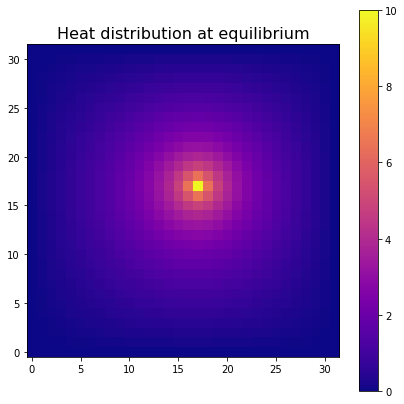

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

N = 32
h = 1/N

def init_heat_grid(heat_grid, points):
    
    """  Adds external sources to a solution of the heat equation. 
    
          inputs:  - an initial 2d array heat_grid which represents a starting 
                     heat distribution.
                   - a list that contains sublists, each of them contaning the position of a given source 
                     (given as a pair of integers) and its constant value.
    """
    
    for i in list(range(len(points))):
    
        #A warning message is displayed if the user attempts to place the sources on the boundaries.
        if (points[i][0] == N-1 or points[i][0] == 0 or points[i][1] == 0 or points[i][1] == 0):
            warnings.warn('Source(s) on the boundaries!')  
        
        heat_grid[points[i][0], points[i][1]] = points[i][2]
        
    
def update_time_points(heat_grid, kappa, deltat, points):
    
    """  Progates the discretized solution of the 2d heat equation with external sources. 
    
          inputs:  - an initial 2d array heat_grid which represents a starting 
                     heat distribution.
                   - the termal conduction coefficient kappa.
                   - a time step deltat.
                   - a list that contains sublists, each of them contaning the position of a given source 
                     (given as a pair of integers) and its constant value.
    """
    #Implementation of the formula for the discretized solution.
    heat_grid[1:-1,1:-1] = heat_grid[1:-1,1:-1]+((deltat*kappa**2)/(h**2))*(heat_grid[1:-1,0:-2]
                    + heat_grid[1:-1,2:]-4*heat_grid[1:-1,1:-1]+heat_grid[0:-2,1:-1]+heat_grid[2:,1:-1])
    
    init_heat_grid(heat_grid[1:-1,1:-1], points) #It adds the external sources.
    

interval = np.linspace(0, 1, N) #Discretization of one axis.
initial_condition = np.sin(np.pi*interval)
xx, yy = np.meshgrid(initial_condition, initial_condition) #Creation of a 2d array.
heat_grid = xx*yy  #(Wrong) initial distribution without sources at t = 0

#Implementation of the boundary conditions.
heat_grid[0:,0] = 0
heat_grid[0:, np.shape(heat_grid)[1]-1] = 0
heat_grid[0, 0:] = 0
heat_grid[np.shape(heat_grid)[0]-1, 0:] = 0

#Initial values for the simulation.
kappa = 1
deltat = 0.0001
points = [[np.int(N/2), np.int(N/2), 10]] #One source in the middle of the grid. Change this at will.

#Correct initial heat distribution at time t = 0 with the sources.
init_heat_grid(heat_grid, points) 

#The loop looks for the saturation condition. 
j = 1
while (j < 10000):
    prev_grid= np.copy(heat_grid)
    update_time_points(heat_grid, kappa, deltat, points)
    if (np.abs(np.sum(heat_grid - prev_grid)) > 10**(-4)): 
        j = j + 1
    else:
        break

print("The number of iterations is", j)    

#Figure size.
plt.figure(figsize = (7,7))

#Plotting the data with colour scheme plasma.
image = plt.imshow(origin='lower', X = heat_grid, cmap = plt.cm.plasma)

#Adding the colour bar.
cbar = plt.colorbar(image)

#Title of the picture.
plt.title('Heat distribution at equilibrium', fontsize = 16)
plt.show()


nbgrader tests

In [ ]:
# initials
N = 7
heat_grid = np.zeros((N,N), dtype=np.float64)

points = [[N//3, N//3, 20], [N//3,2*N//3, 20], [2*N//3,N//3,20], [2*N//3,2*N//3,20]]

init_heat_grid(heat_grid, points)

assert(heat_grid[2,2] == 20.)
assert(heat_grid[2,4] == 20.)
assert(heat_grid[4,2] == 20.)
assert(heat_grid[4,4] == 20.)

heat_grid = np.zeros((N,N), dtype=np.float64)

points = [[0,0,20], [N-1,N-1,20]]
init_heat_grid(heat_grid, points)
assert(heat_grid[0,0] == 0.)
assert(heat_grid[N-1,N-1] == 0.)

## 3. Animation

After we have done some initial setups we can go on with the animation. For this task we can use the widget ```clear_output``` from ```IPython.display``` package. Making use of this function, we will create heatmaps at each time step and clear the previous frame which will lead to a nice continues flow of images. <br>

**The Code Recipe:**

We are going to use the functions from the previous exercises to place heat sources at desired points on the grid. <br>
We need to write a function that; 
- Clears any previous image
- Creates a figure that is large enough to display nice images.
- Should take ```heat_grid``` data, ```kappa```, ```deltat``` and an array with the external source locations on the grid.
- Displays the data with proper axis, labels, colorbar etc.
- After the display, the function should update the time step by calling the proper function as in previous tasks.

Later, create points to place external sources. Initiate the grid with proper setup. 

**Your tasks**:
* Write a function ```animate_frame``` following the recipe.
* Setup three different sets of external sources, one with 2 and one with 4 points placed symmetrically in the center. The third set is left to your choice for experimenting. 
* Call your function for 50 times and display the animation.
* Try different point set and enjoy!

**Hints**:

 * For tests you can use also different combinations for *kappa* and *timestep*. The whole simulation is only working if the change from frame to frame is small due to the discretization of the plate and time. If kappa multiplied by timestep is too large, then you will see no proper simulation but a rather oscillating state which has nothing to do with reality! Set $\kappa=1$, $N=32\times32$ and choose a time step of $\Delta t=0.0001$ for the proper results.
 * You can create a figure with ```matplotlib.pyplot.figure()``` and adjust the figure size with its arguments.
 * Explore the different colormaps and choose a proper one for displaying such experiment.
 * Explore the ```matplotlib.pyplot.imshow``` arguments. ```vmin, vmax``` are useful for constraining the colorbar colors.

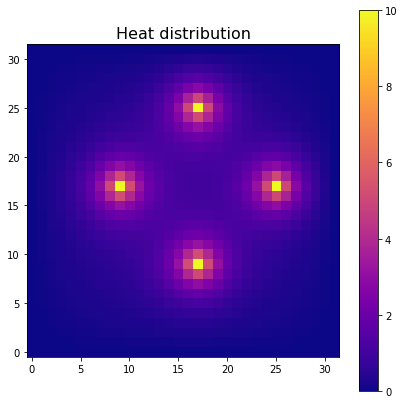

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output

def animate_frame(heat_grid, kappa, deltat, points):
    
    """ Shows an animation representing the evolution of the heat equation solution.
    
          inputs:  - an initial 2d array heat_grid which represents a starting 
                     heat distribution.
                   - the termal conduction coefficient kappa.
                   - a time step deltat.
                   - a list that contains sublists, each of them contaning the position of a given source 
                     (given as a pair of integers) and its constant value.
    """
    
    #Size of figure
    plt.figure(figsize = (7,7))
    
    #Plotting the data with colour scheme plasma.
    image = plt.imshow(origin='lower', X = heat_grid, cmap = plt.cm.plasma)

    #Adding the colour bar.
    cbar = plt.colorbar(image)
    
    #Title of the picture.
    plt.title('Heat distribution', fontsize = 16) 
   
    #It shows the animation.
    plt.show()
    
    #It clears the previous image.
    clear_output(wait = True)
    
    #It progates the solution.
    update_time_points(heat_grid, kappa, deltat, points)
        

interval = np.linspace(0, 1, N) #Discretization of one axis.
initial_condition = np.sin(np.pi*interval)
xx, yy = np.meshgrid(initial_condition, initial_condition)
heat_grid = xx*yy  #(Wrong) initial distribution without sources at t = 0

#Fixed values.
kappa = 1
deltat = 0.0001
M = 50

#Animations. Uncomment the one you choose.

#points = [[np.int(N/2), np.int(N/4), 10], [np.int(N/2), np.int((3/4)*N), 10]] 
#init_heat_grid(heat_grid, points) #Correct initial heat distribution at time t = 0 with the sources.

#for i in range(M):
 #   animate_frame(heat_grid, kappa, deltat, points)


points = [[np.int(N/2), np.int(N/4), 10], [np.int(N/2), np.int((3/4)*N), 10], [np.int(N/4), np.int(N/2), 10], [np.int((3/4)*N), np.int(N/2), 10]]
init_heat_grid(heat_grid, points) #Correct initial heat distribution at time t = 0 with the sources.

for i in range(M):
    animate_frame(heat_grid, kappa, deltat, points)

# 2. Word doubling (20 Points)

When writing a text, we often make the mistake to repeat a word.

   ```
   When typing longer texts, we often often make the mistake to
   repeat individual words such as here here.

   ```
   
Write a program in a notebook cell which reads a text file and marks positions with such mistakes. You should print lines and linenumbers with double words. Consider also cases where a word doubling occurs directly before and after a line break.

You can find a short example text for test purposes [here](double_words.txt).

**Note:**
An obvious ansatz for the problem is to read a line, to split it according to spaces, tabulators and line breaks and to perform the double word test. This, however is no complete solution to the problem! Consider again the above example:

   ```
   ... such as here here.
   ```
   
The double word `here` would not be recognised because the second one is directly followed by a dot (end of sentence mark). There are similar issues with other punctuation marks such as semicolons, parentheses and so on. See the following cell for a possibility to take this into account.

**Example:** The [example text](double_words.txt) gives the follwing output with my code:
```
Repetition in line 1. Word "often" at position 6!
Repetition in line 2. Word "here" at position 6!
Repetition of the first word "words" on line 5. It occured at the end of the previous (non-empty) line!
Repetition of the first word "test" on line 9. It occured at the end of the previous (non-empty) line!

```

**Hints**: 

We had introduced regular expressions in the tutorial sessions, which can be used from the Python module ```re```. Using regular expressions can help to split a given string into word avoiding to have punctuations and other non wanted characters in the results.

In [ ]:
import re  # for the regular expressions

# YOUR CODE HERE
raise NotImplementedError()